In [1]:

import os
import pandas as pd
import numpy as np
file_path = "../data/"

data = pd.read_csv(file_path+"processed_data.csv")

data



,news_date,tokens
0,1/6/2011 2:45:49 PM,"தூக்கில்,தொங்கும்,சேவல்கள்,திருடர்களை,காவு,வாங..."
1,1/6/2011 2:56:51 PM,"பவுர்ணமி,ஜாமத்தில்,மாயமான,கர்ப்பிணி"
2,1/6/2011 3:02:00 PM,"காமன்வெல்த்,ஊழல்,சுரேஷ்,கல்மாடியிடம்,கேள்விகள்"
3,1/6/2011 3:08:15 PM,"மச்சுபிச்சு,மலை,ரகசியம்"
4,1/6/2011 3:09:20 PM,"ரத்த,பலி,வாங்கும்,விபரீதம்,ஆவி"
...,...,...
9995,7/14/2011 1:09:23 PM,"பயிற்சி,ஆட்டத்தில்,இந்தியா,நாளை,மோதல்"
9996,7/14/2011 1:54:26 PM,"சச்சின்,புதிய,அவதாரம்,நாசர்,உசேன்"
9997,7/14/2011 2:02:13 PM,"லோக்பாலில்,பிரதமர்,ராகுல்காந்தி,எதிர்ப்பு"
9998,7/14/2011 2:10:53 PM,"நக்சல்கள்,தப்பினர்,போலீசார்,சஸ்பெண்ட்"


In [2]:

  
data["tokens"] = data["tokens"].map(lambda x: str(x).split(","))


In [3]:

                                      
# Create a dictionary from ‘tokens’ containing the number of times a word appears in the training set.

from gensim import corpora

text_data = data["tokens"]
dictionary = corpora.Dictionary(text_data)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(text) for text in text_data]



In [4]:

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')


In [5]:
from gensim.models import LdaMulticore

NUM_TOPICS = 15
ldamodel = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=NUM_TOPICS, workers = 4, passes=10)
ldamodel.save('LDAmodel.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.090*"தேர்தல்" + 0.031*"ஜெயலலிதா" + 0.024*"புதிய" + 0.023*"முதல்வர்"')
(1, '0.042*"மோதல்" + 0.040*"நாளை" + 0.038*"கோடி" + 0.037*"இன்று"')
(2, '0.088*"பலி" + 0.038*"மோதி" + 0.036*"பஸ்" + 0.034*"மக்கள்"')
(3, '0.056*"தடை" + 0.035*"கோயில்" + 0.034*"பிரதமர்" + 0.032*"வேண்டு"')
(4, '0.038*"தலைவர்" + 0.036*"விலை" + 0.030*"முதல்வர்" + 0.023*"ஐகோர்ட்"')
(5, '0.087*"கைது" + 0.086*"கொலை" + 0.042*"டைமிங்" + 0.037*"ஷாட்"')
(6, '0.088*"வழக்கு" + 0.044*"போலீஸ்" + 0.038*"மாணவி" + 0.035*"ஆண்டு"')
(7, '0.070*"லட்சம்" + 0.056*"திமுக" + 0.037*"பறிமுதல்" + 0.032*"பணம்"')
(8, '0.036*"பயங்கரம்" + 0.033*"தாக்குதல்" + 0.032*"செய்" + 0.031*"அமெரிக்கா"')
(9, '0.044*"வது" + 0.038*"ரயில்" + 0.035*"ல்" + 0.026*"கடத்தல்"')
(10, '0.054*"வெற்றி" + 0.035*"திடீர்" + 0.032*"வீடு" + 0.024*"கொள்ளை"')
(11, '0.079*"அரசு" + 0.035*"வீட்டில்" + 0.030*"கொள்ளை" + 0.023*"கல்வி"')
(12, '0.034*"_" + 0.032*"அரசு" + 0.025*"நடிகை" + 0.022*"சச்சின்"')
(13, '0.063*"இந்தியா" + 0.061*"பெண்" + 0.032*"வீரர்" + 0.024*"ராணுவம்"')
(14, '

In [6]:
from gensim.models import CoherenceModel

topics = []
score = []
for i in range(1,16,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = data['tokens'], corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())

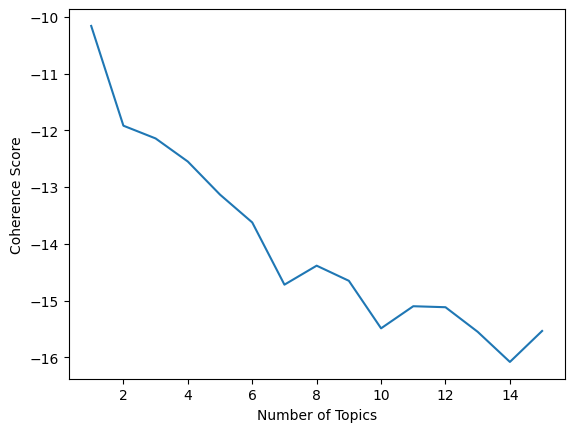

In [7]:
import matplotlib.pyplot as plt
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [8]:
score

[-10.161600479030046,
 -11.918713076319165,
 -12.143200324112792,
 -12.550141165269727,
 -13.132706174259535,
 -13.622309284569496,
 -14.71831713293709,
 -14.383724226879211,
 -14.65012582905207,
 -15.48717220125575,
 -15.097877335148485,
 -15.115403687422045,
 -15.548480034568705,
 -16.07869559316126,
 -15.533392538214795]

In [9]:
import pyLDAvis.gensim_models
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()

lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(lda_viz, 'lda.html')


/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [10]:
from gensim.models import KeyedVectors
from gensim.models import word2vec
from gensim import corpora, models

# Load pre-trained Word2Vec model for Tamil language
model_path = "/Users/samyuktha/FYP/data/cc.ta.300.vec.gz"
w2v_model = KeyedVectors.load_word2vec_format(model_path)

# Compute coherence score using Word2Vec similarity measure

cm = CoherenceModel(model=lda_model, texts = data['tokens'], 
corpus=corpus, dictionary=dictionary, 
coherence='c_w2v',keyed_vectors=w2v_model)

coherence_score = cm.get_coherence()

print("Coherence Score:", coherence_score)

Coherence Score: 0.48064196
